In [1]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import sys,os
import random

## 1.1 Deterministic environment

In [2]:
class GridEnvironment(gym.Env):
    def __init__(self):
        # Initializes the class
        # Define action and observation space
        
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.reward_space = spaces.Discrete(16)
        self.max_timesteps = 15
        #self.total_reward = 0
        self.rewards = {
            (0,3):3, #3
            (2,0):-5, #8
            (2,3):-3, #11
            (3,3):10 #15
        }
        #pass
        
    def step(self,action):
        
        try:
            # Executes one timestep within the environment
            # Input to the function is an action

            print("current-position: ",self.agent_pos)
            self.change_position(action)
  
            #change state based on move made
            self.agent_pos = np.clip(self.agent_pos, 0, 3)
            self.state = self.make_grid()
            observation = self.state.flatten()

            #collect immediate rewards existing. change rewards after collecting
            reward = self.get_reward()
            
            #check if ur in terminal state
            if (self.agent_pos == self.goal_pos).all():
                done = True
            
            #check-timestep
            self.timestep += 1
            done = True if self.timestep >= self.max_timesteps else False

            #pass any useful info needed
            info = {}
            return observation, reward, done, info
        
        except Exception as e:
            print(e)
            traceback.print_exc()

    def reset(self):
        # Resets the state of the environment to an initial state
        
        self.timestep = 0 
        self.agent_pos = [0, 0] #start-index
        self.goal_pos = [3, 3] #end-index
        self.state = self.make_grid() #create grid with given positions
        observation = self.state.flatten() #flatten grid array
        self.rewards = {
            (0,3):3, #
            (2,0):-5, #8
            (2,3):-2, #11
            (3,3):10 #15
        }
        return observation
        #pass
        
        
    def render(self):
        # Visualizes the environment
        # Any form like vector representation or visualizing using matplotlib will be sufficient
        plt.imshow(self.state)
        pass
    
    ##helper functions to handle grid-reset and rewards
    
    
    def change_position(self,action):
        #get moving-indices
        if action == 3: #move south
            self.agent_pos[0] += 1
        elif action == 1: #move north
            self.agent_pos[0] -= 1
        elif action == 2: #move right
            self.agent_pos[1] += 1
        elif action == 0: #move left
            self.agent_pos[1] -= 1
        else:
            #pass #add logic for other actions
            return -1
    
    def make_grid(self):
        try:
            state = np.ones((4, 4)) #create grid 
            state[tuple(self.agent_pos)] = 0.8 #color-initial state
            state[tuple(self.goal_pos)] = 0.9 #color final-state
            return state
        
        except Exception as e:
            print(e)
            traceback.print_exc()

    
    def get_reward(self):
        try:
            if tuple(self.agent_pos) in self.rewards.keys():
                rew = self.rewards[tuple(self.agent_pos)]
                if rew > 0:
                    self.rewards[tuple(self.agent_pos)] = 0                
                return rew
            return 0
        
        except Exception as e:
            print(e)
            traceback.print_exc()


In [3]:
env = GridEnvironment()
print(env.__dict__)

{'observation_space': Discrete(16), 'action_space': Discrete(4), 'reward_space': Discrete(16), 'max_timesteps': 15, 'rewards': {(0, 3): 3, (2, 0): -5, (2, 3): -3, (3, 3): 10}}


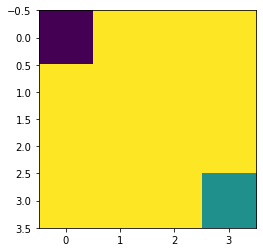

In [4]:
env.reset()
env.render()

current-position:  [0, 0]
action:  2 reward:  0 

current-position:  [0 1]
action:  3 reward:  0 

current-position:  [1 1]
action:  0 reward:  0 

current-position:  [1 0]
action:  0 reward:  0 

current-position:  [1 0]
action:  3 reward:  -5 

current-position:  [2 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  2 reward:  0 

current-position:  [3 1]
action:  0 reward:  0 

current-position:  [3 0]
action:  0 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  0 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

total-reward:  -5


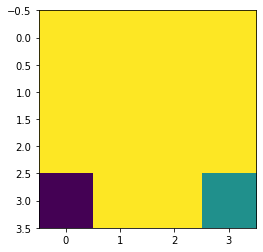

In [12]:
def main():
    try:
        
        env = GridEnvironment()
        env.reset()
        
        total_reward = 0
        action_space = list(np.arange(0,4))
        actions = random.choices(action_space,k=50, weights=(0.25,0.25,0.25,0.25))   
        for action in actions:
            observation, reward, done, _ = env.step(action)
            print("action: ",action,"reward: ",reward,"\n")
            total_reward += reward
            env.render()
            if done == 1:
                env.reset()
                break
        print("total-reward: ",total_reward)
    except Exception as e:
            print(e)
            traceback.print_exc()
main()      

## 1.2 Stochastic environment

In [7]:
class GridEnvironment_stochastic(GridEnvironment):
    
    #change-posittions-randomly
    def change_position(self,action):
        #get moving-indices
        if action == 0: 
            x = random.choices([0,1],k=1, weights=(0.2,0.8))
            self.agent_pos[1] = -x[0]
            
        elif action == 1: 
            x = random.choices([-1,1],k=1, weights=(0.3,0.7))   
            self.agent_pos[0] += x[0]
            
        elif action == 2: 
            x = random.choices([0,1],k=1, weights=(0.1,0.9))   
            self.agent_pos[1] += x[0]
            
        elif action == 3:
            x = random.choices([-1,0,1],k=1, weights=(0.25,0.25,0.5))   
            self.agent_pos[0] -= x[0]
        else:
            #pass #add logic for other actions
            return -1


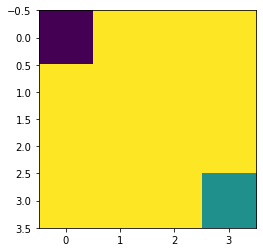

In [8]:
env = GridEnvironment_stochastic()
env.reset()
env.render()

current-position:  [0, 0]
action:  3 reward:  0 

current-position:  [0 0]
action:  3 reward:  0 

current-position:  [1 0]
action:  1 reward:  -5 

current-position:  [2 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  -5 

current-position:  [2 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  0 reward:  0 

current-position:  [3 0]
action:  3 reward:  -5 

current-position:  [2 0]
action:  0 reward:  -5 

current-position:  [2 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  3 reward:  0 

current-position:  [3 0]
action:  0 reward:  0 

current-position:  [3 0]
action:  2 reward:  0 

current-position:  [3 1]
action:  3 reward:  0 

total-reward:  -20


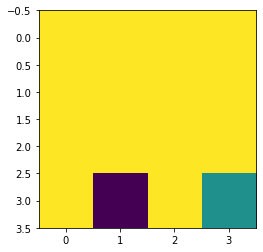

In [10]:
def main():
    try:
        
        env = GridEnvironment_stochastic()
        env.reset()
        
        total_reward = 0
        action_space = list(np.arange(0,4))
        actions = random.choices(action_space,k=30, weights=(0.1,0.1,0.4,0.4))   
        for action in actions:
            observation, reward, done, _ = env.step(action)
            print("action: ",action,"reward: ",reward,"\n")
            total_reward += reward
            env.render()
            if done == 1:
                env.reset()
                break
        print("total-reward: ",total_reward)
    except Exception as e:
            print(e)
            traceback.print_exc()
main()      